<a href="https://colab.research.google.com/github/Kim-Ziho/STUDY_NLP/blob/main/ex_py36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello, world")

# integer
x = 3
print("정수: %01d, %02d, %3d, %04d, %05d" % (x,x,x,x,x))

# float
x = 256.123
print("실수: %.01f, %.1f, %.2f" % (x,x,x))

# string
x = "Hello, world"
print("문자열: [%s]" % (x))

Hello, world
정수: 3, 03,   3, 0003, 00003
실수: 256.1, 256.1, 256.12
문자열: [Hello, world]


In [ ]:
import torch

In [ ]:
def print_val(x):
    print("type: ", type(x))
    print("dtype: ", x.dtype)
    print("Shape: ", x.shape)
    print("값:\n", x, sep='')

In [ ]:
x = torch.rand(2,3,2) 
print_val(x)

x = torch.rand(2,3)
print_val(x)

type:  <class 'torch.Tensor'>
dtype:  torch.float32
Shape:  torch.Size([2, 3, 2])
값:
tensor([[[0.0182, 0.0702],
         [0.3408, 0.1457],
         [0.7036, 0.0037]],

        [[0.9347, 0.4111],
         [0.7479, 0.4666],
         [0.3337, 0.8492]]])
type:  <class 'torch.Tensor'>
dtype:  torch.float32
Shape:  torch.Size([2, 3])
값:
tensor([[0.0453, 0.0647, 0.3201],
        [0.9550, 0.0084, 0.4155]])


In [ ]:
x = torch.randperm(4)
print_val(x)

type:  <class 'torch.Tensor'>
dtype:  torch.int64
Shape:  torch.Size([4])
값:
tensor([2, 1, 3, 0])


In [ ]:
x = torch.arange(0, 10, step=0.5)
print_val(x)

type:  <class 'torch.Tensor'>
dtype:  torch.float32
Shape:  torch.Size([20])
값:
tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000, 5.5000, 6.0000, 6.5000, 7.0000, 7.5000, 8.0000, 8.5000,
        9.0000, 9.5000])


In [ ]:
print_val(torch.ones(3,4))
print_val(torch.zeros(3,4))

type:  <class 'torch.Tensor'>
dtype:  torch.float32
Shape:  torch.Size([3, 4])
값:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
type:  <class 'torch.Tensor'>
dtype:  torch.float32
Shape:  torch.Size([3, 4])
값:
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [ ]:
print_val(torch.Tensor(2, 4))

type:  <class 'torch.Tensor'>
dtype:  torch.float32
Shape:  torch.Size([2, 4])
값:
tensor([[4.8614e+17, 3.0771e-41, 3.7835e-44, 0.0000e+00],
        [       nan, 6.4460e-44, 1.3733e-14, 6.4069e+02]])


In [ ]:
print_val(torch.Tensor([2, 3]))

type:  <class 'torch.Tensor'>
dtype:  torch.float32
Shape:  torch.Size([2])
값:
tensor([2., 3.])


# MNIST

In [ ]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
mnist_train = dset.MNIST("", train=True, transform=transforms.ToTensor(),
                         target_transform=None, download=True)
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(),
                         target_transform=None, download=True)

In [ ]:
image, label = mnist_train.__getitem__(0)
print(image.size(), label)

torch.Size([1, 28, 28]) 5


In [ ]:
image, label = mnist_train[1]
print(image.size(), label)

torch.Size([1, 28, 28]) 0


In [ ]:
print(mnist_train.__len__())
print("mnist_train 길이:", len(mnist_train))
print("mnist_test 길이:", len(mnist_test))

60000
mnist_train 길이: 60000
mnist_test 길이: 10000


In [ ]:
print(mnist_train[0][1])
print(mnist_train[0][0].size())

5
torch.Size([1, 28, 28])


In [ ]:
for i in range(3):
    img = mnist_train[i][0].numpy()
    plt.title("lable: %d" % mnist_train[i][1])
    plt.imshow(img[0], cmap='gray')
    plt.show()

In [ ]:
batch_size = 16

In [ ]:
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100],
                                           batch_size=batch_size, shuffle=True,
                                           num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader((mnist_test), 
                                           batch_size=batch_size, shuffle=True,
                                           num_workers=2, drop_last=True)

[0]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


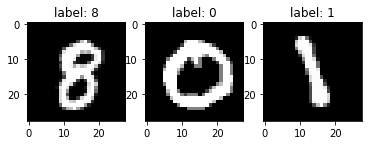

[1]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


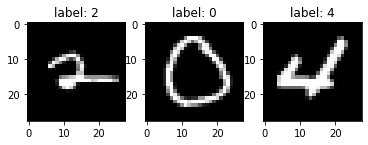

[2]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


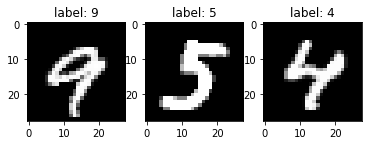

[3]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


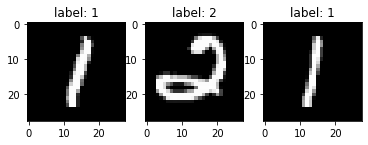

[4]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


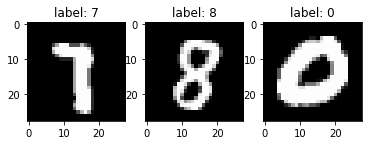

[5]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


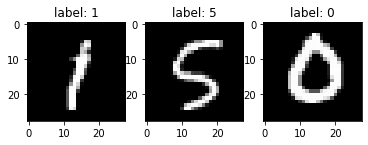

In [97]:
n = 3
for i, [imgs, labels] in enumerate(test_loader):
    if i > 5:
        break

    print("[%d]" %i)
    print("한 번에 로드되는 데이터 크기:", len(imgs))
    
    x = Variable(imgs).cuda()
    x = x.reshape((x.shape[0], x.shape[2], x.shape[3]))
    y_ = Variable(labels).cuda()

    print(x.shape)
    print(y_.shape)

    for j in range(n):
        img = imgs[j].numpy()
        img = img.reshape((img.shape[1], img.shape[2]))

        plt.subplot(1, n, j+1)
        plt.imshow(img, cmap='gray')
        plt.title("label: %d" % labels[j])
    plt.show()